# 911 Calls Analysis Project
by Dev Patel

In this project I will analyse Emergency 911 Calls data from [kaggle](https://www.kaggle.com/mchirico/montcoalert) using NumPy, Pandas, Matplotlib, and Seaborn.

Just for reference, the data set contains the following fields:
* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# Raading the csv file as a pandas dataframe

df = pd.read_csv('911.csv')

In [3]:
# Info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
# Looking at the head of the dataframe

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Basic Questions:

In [5]:
# Top 5 zip codes for 911 calls

df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [6]:
# Top 5 townships for 911 calls

df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [7]:
# Number of unique title codes

df['title'].nunique()

110

Creating new features:

In [8]:
# Creating a new column called "Reason" that contains the "Reasons/Department" specified before the title code

df['Reasons'] = df['title'].apply(lambda title: title.split(':')[0])
df['Reasons']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reasons, Length: 99492, dtype: object

In [9]:
# Most common Reason for a 911 call based on this new 'Reaons' column

df['Reasons'].value_counts().head(1)

EMS    48877
Name: Reasons, dtype: int64

<AxesSubplot:xlabel='Reasons', ylabel='count'>

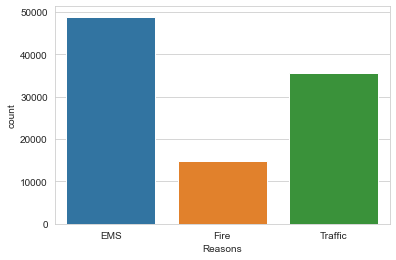

In [10]:
# Countplot of 911 calls by Reason

sns.countplot(data=df, x='Reasons')

In [11]:
# Converting the timeStamp column objects from str to datetime

print('Obj type before converting:', type(df['timeStamp'].iloc[0]))
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
print('Obj type after converting:', type(df['timeStamp'].iloc[0]))

Obj type before converting: <class 'str'>
Obj type before converting: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [20]:
# Creating 3 new columns in df for Hour, Month, and Day of Week based on the timeStamp column

df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

dofw_map = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dofw_map)

df[['Hour', 'Month', 'Day of Week']]

,Hour,Month,Day of Week
0,17,12,Thu
1,17,12,Thu
2,17,12,Thu
3,17,12,Thu
4,17,12,Thu
...,...,...,...
99487,11,8,Wed
99488,11,8,Wed
99489,11,8,Wed
99490,11,8,Wed


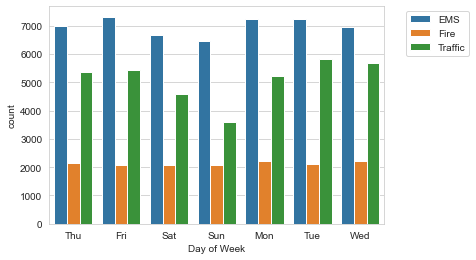

In [31]:
# Countplot for Day of Week column with the hue based on the Reasons column

sns.countplot(x='Day of Week', data=df, hue='Reasons')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2) #relocating the legend

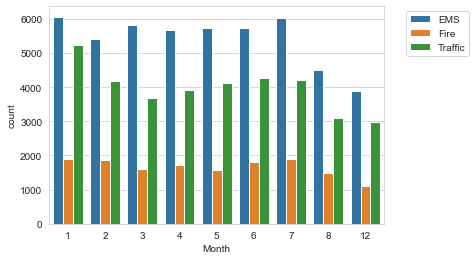

In [30]:
# # Countplot for Month column with the hue based on the Reasons column

sns.countplot(x='Month', data=df, hue='Reasons')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2) #relocating the legend

** It is observed that months between 8-12 are missing in the above plot. In the project ahead, I will be filling in this information by plotting the information in another way **

In [33]:
# Grouping the df by Month column

byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


<AxesSubplot:xlabel='Month'>

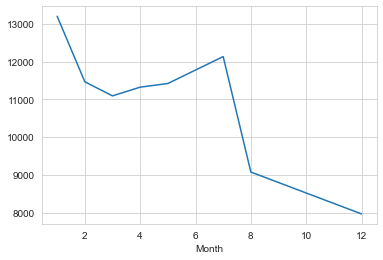

In [34]:
# Creating a simple plot of df indicating the count of calls per month

byMonth['twp'].plot()  # any column could be used here. (I used latitude)

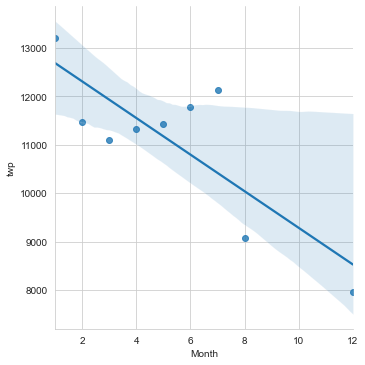

In [35]:
# Creating a linear fit on the number of calls per month using seaborns linear model plot

sns.lmplot(data=byMonth.reset_index(), x='Month', y='twp')

In [39]:
# Creating a new 'Date' column in df that contains the date from the timeStamp column

df['Date']=df['timeStamp'].apply(lambda t: t.date())
df['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

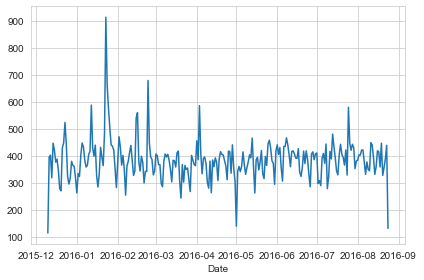

In [43]:
# Grouping this Date column and creating a plot of counts of 911 calls

df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

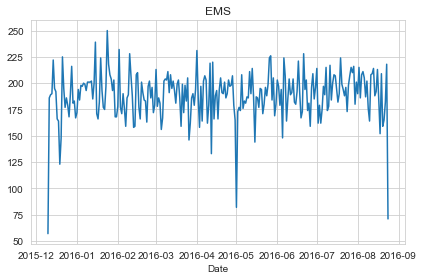

In [50]:
# Recreating this plot for each Reason separately

# Reason-1: EMS
df[df['Reasons']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

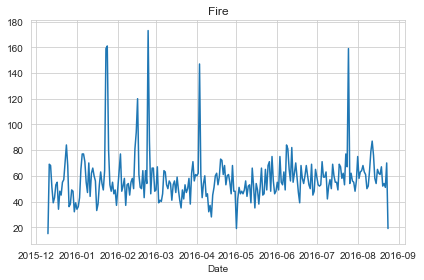

In [51]:
# Reason-2: Fire
df[df['Reasons']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

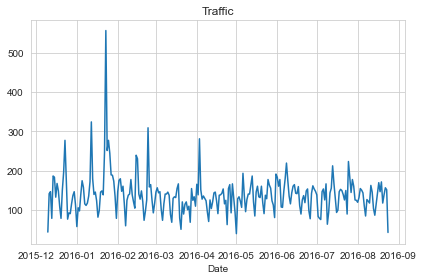

In [52]:
# Reason-3: Traffic
df[df['Reasons']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

In [56]:
# Restructuring df so that the columns become the Hours and the Index becomes the Day of Week
# This is to help create heatmaps

restructured_df = df.groupby(by=['Day of Week','Hour']).count()['Reasons'].unstack()
restructured_df

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

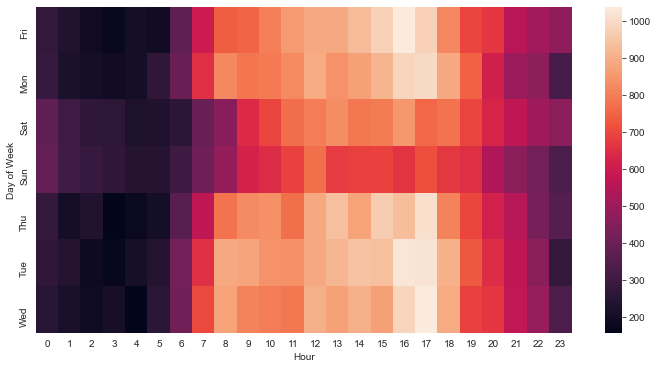

In [58]:
# Heatmap using restructured_df 

plt.figure(figsize=(12,6))
sns.heatmap(restructured_df)

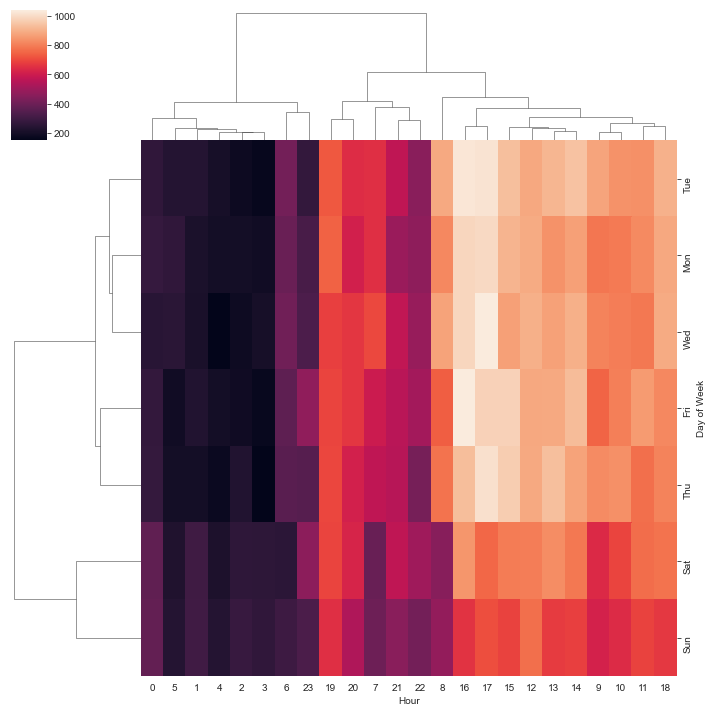

In [59]:
# Clustermap using restructured_df

sns.clustermap(restructured_df)

In [60]:
# Now again, Restructuring df so that the columns become the Month and the Index becomes the Day of Week

restructured_df_2 = df.groupby(by=['Day of Week','Month']).count()['Reasons'].unstack()
restructured_df_2

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

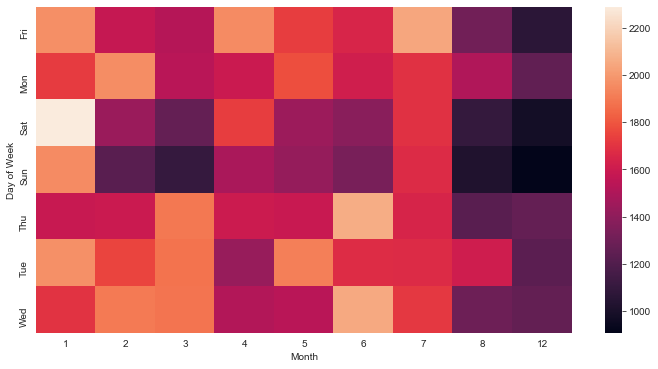

In [62]:
# Heatmap using restructured_df_2

plt.figure(figsize=(12,6))
sns.heatmap(restructured_df_2)

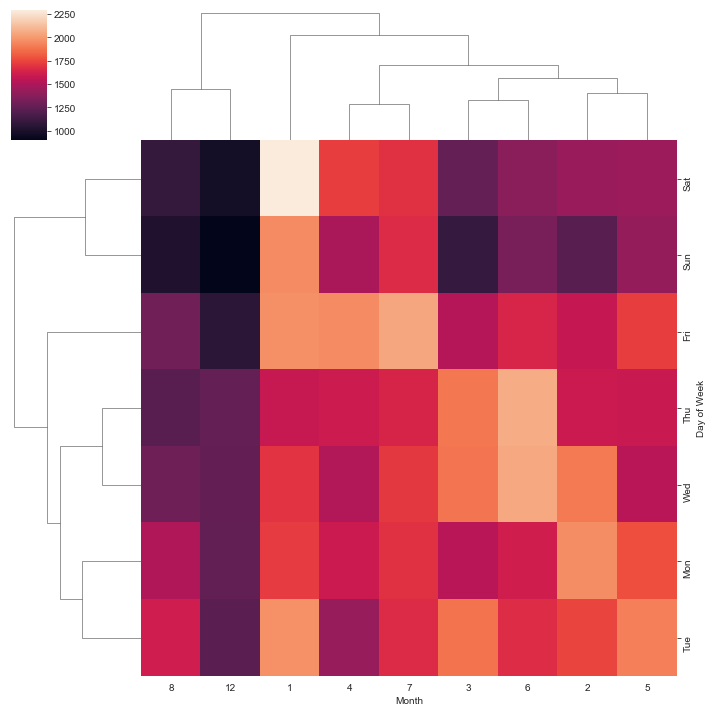

In [64]:
# Clustermap using restructured_df_2

sns.clustermap(restructured_df_2)